<a href="https://colab.research.google.com/github/jacobpad/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS12_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [1]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Load the Car Evaluation Dataset
car_eval_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

# Check it out
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

In [0]:
# PANDAS Import!
import pandas as pd

In [0]:
# Load DataFrame
df = pd.read_csv(car_eval_url)

In [4]:
# Head View
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [0]:
# Reset Heaers
column_headers = ['Class_Value', 'Buying', 'Maint', 'Doors', 'Persons', 
                  'Lug_Boot', 'Saftey']                  

In [6]:
# Check shape
df.shape

(1727, 7)

In [0]:
# Shapes wrong - UCI claims almost 49k

In [0]:
# Load it anew
df = pd.read_csv(car_eval_url, header=None, names=column_headers)

In [9]:
# Check Head & Tail
print(df.head())
print(df.tail())

  Class_Value Buying Maint Doors Persons Lug_Boot Saftey
0       vhigh  vhigh     2     2   small      low  unacc
1       vhigh  vhigh     2     2   small      med  unacc
2       vhigh  vhigh     2     2   small     high  unacc
3       vhigh  vhigh     2     2     med      low  unacc
4       vhigh  vhigh     2     2     med      med  unacc
     Class_Value Buying  Maint Doors Persons Lug_Boot Saftey
1723         low    low  5more  more     med      med   good
1724         low    low  5more  more     med     high  vgood
1725         low    low  5more  more     big      low  unacc
1726         low    low  5more  more     big      med   good
1727         low    low  5more  more     big     high  vgood


In [0]:
# The values seem to be poorly inputed.

In [11]:
# Check for nulls
df.isnull().any()

Class_Value    False
Buying         False
Maint          False
Doors          False
Persons        False
Lug_Boot       False
Saftey         False
dtype: bool

In [12]:
df.isnull().sum()

Class_Value    0
Buying         0
Maint          0
Doors          0
Persons        0
Lug_Boot       0
Saftey         0
dtype: int64

In [13]:
df.describe()

,Class_Value,Buying,Maint,Doors,Persons,Lug_Boot,Saftey
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,2,med,low,unacc
freq,432,432,432,576,576,576,1210


In [14]:
df.describe(exclude='number')

,Class_Value,Buying,Maint,Doors,Persons,Lug_Boot,Saftey
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,2,med,low,unacc
freq,432,432,432,576,576,576,1210


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [16]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris (1).data


In [0]:
# Read file
df = pd.read_csv('iris.data')

In [18]:
df.shape

(149, 5)

In [0]:
# Shape is right

In [20]:
# Check headers
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [0]:
# Fix column headers
column_header = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
                 'petal width in cm', 'class']
df = pd.read_csv('iris.data', header=None, names=column_header)

In [22]:
# Check headers & head
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# # Check tail
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
# Check nulls
df.isnull().any()

sepal length in cm    False
sepal width in cm     False
petal length in cm    False
petal width in cm     False
class                 False
dtype: bool

In [25]:
# Check null count
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [26]:
# Describe
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# Describe everything
df.describe(include='all')

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [28]:
# Describe everything except the numbers
df.describe(exclude='number')

,class
count,150
unique,3
top,Iris-virginica
freq,50


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [29]:
# Crosstab of data

# Provides quantity of flowers that match the row/column
pd.crosstab(df['sepal length in cm'], df['petal length in cm'])

petal length in cm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
sepal length in cm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.4,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.6,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.7,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.8,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.9,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,0,0,1,1,2,1,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.1,0,0,0,0,2,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

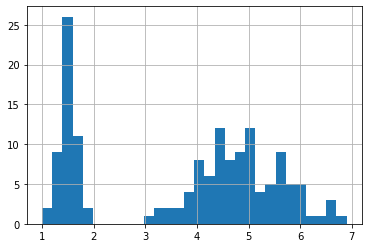

In [30]:
# Histogram
df['petal length in cm'].hist(bins=30);

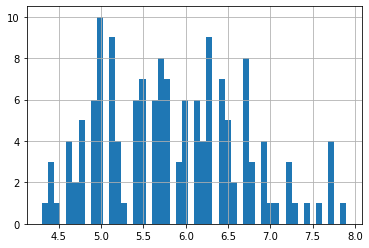

In [31]:
# Histogram
df['sepal length in cm'].hist(bins=50);

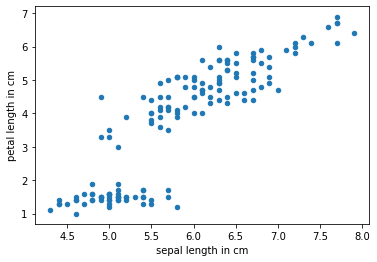

In [32]:
# Scatterplot
df.plot.scatter('sepal length in cm', 'petal length in cm');

# As the flower gets bigger, the petals get bigger also

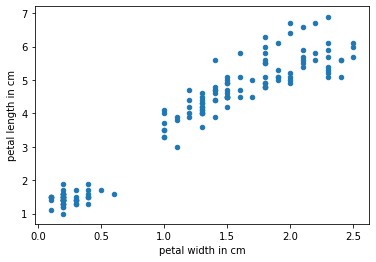

In [33]:
# Scatterplot
df.plot.scatter('petal width in cm', 'petal length in cm');

# As the petals gets wider, the petals get longer 

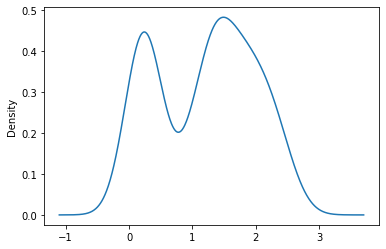

In [34]:
# Density Plot
df['petal width in cm'].plot.density();

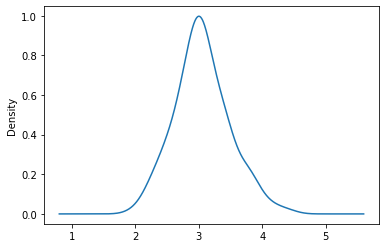

In [35]:
# Density Plot
df['sepal width in cm'].plot.density();

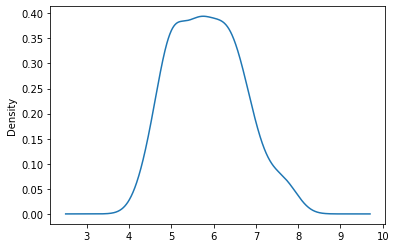

In [36]:
# Density Plot
df['sepal length in cm'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


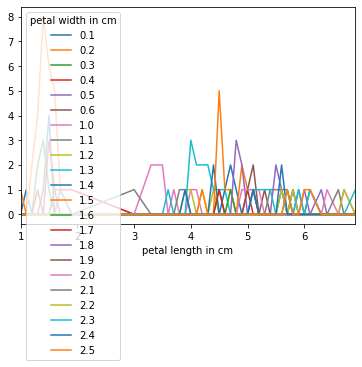

In [37]:
# Crosstab visulation
table1 = pd.crosstab(df['petal length in cm'], df['petal width in cm'])
table1.plot();

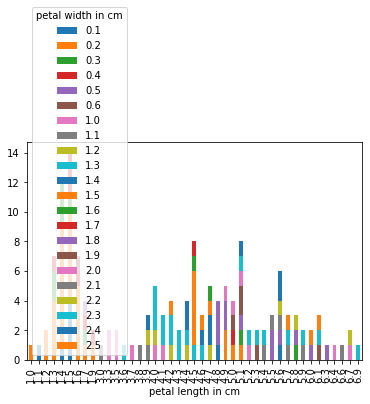

In [38]:
# Crosstab visulation
table1 = pd.crosstab(df['petal length in cm'], df['petal width in cm'])
table1.plot(kind='bar', stacked=True);

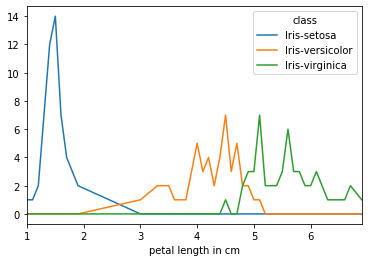

In [39]:
# Crosstab visulation
table1 = pd.crosstab(df['petal length in cm'], df['class'])
table1.plot();

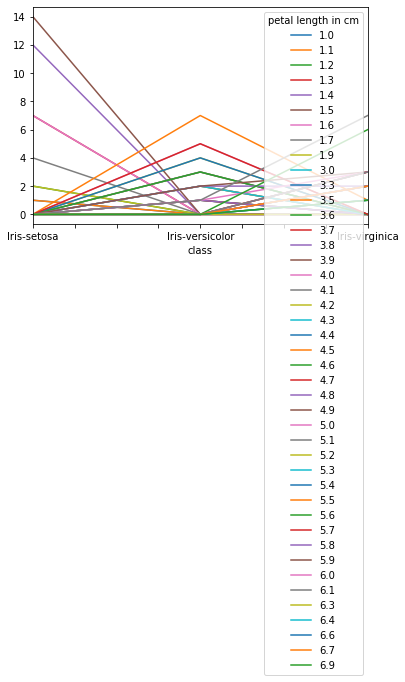

In [40]:
# Crosstab visulation
# Same as above, just offers different way of seeing things
table1 = pd.crosstab(df['class'], df['petal length in cm'])
table1.plot();

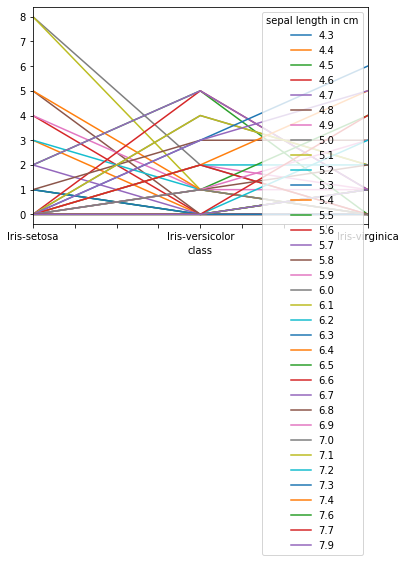

In [41]:
# Crosstab visulation
# Just cause I'm curious
table1 = pd.crosstab(df['class'], df['sepal length in cm'])
table1.plot();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
# Import PHX weather data
# https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KPHX.csv
tempURL = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KPHX.csv'
df = pd.read_csv(tempURL)

In [43]:
# Check it out
df.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,98,86,109,82,107,65,115,1927,1990,0.00,0.02,2.68
1,2014-7-2,98,86,109,82,107,65,118,1911,2011,0.00,0.01,2.81
2,2014-7-3,94,79,108,82,107,64,117,1916,1907,0.00,0.02,0.22
3,2014-7-4,90,81,98,83,107,63,118,1912,1989,0.00,0.02,0.22
4,2014-7-5,94,84,103,83,107,63,116,1912,1983,0.01,0.02,0.18


In [44]:
df.tail()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
360,2015-6-26,98,89,107,81,106,62,122,1963,1990,0.00,0.00,0.07
361,2015-6-27,99,90,108,81,106,55,118,1965,1990,0.01,0.00,0.04
362,2015-6-28,99,87,110,81,106,59,118,1965,1990,0.00,0.01,0.26
363,2015-6-29,98,86,110,81,107,59,119,1913,2013,0.05,0.00,0.09
364,2015-6-30,96,85,107,82,107,64,115,1913,1950,0.00,0.00,0.21


In [45]:
# Check for null
df.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [46]:
# Describe
df.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,77.320548,65.761644,88.389041,63.501370,86.717808,43.016438,100.010959,1934.356164,1976.279452,0.027726,0.022000,0.770466
std,14.055375,14.095072,14.506228,14.070588,14.704034,14.946783,12.650626,24.477041,29.460417,0.205119,0.012649,0.537395
min,41.000000,31.000000,46.000000,44.000000,65.000000,16.000000,77.000000,1895.000000,1896.000000,0.000000,0.000000,0.010000
25%,66.000000,54.000000,77.000000,50.000000,72.000000,30.000000,88.000000,1913.000000,1956.000000,0.000000,0.010000,0.360000
50%,77.000000,65.000000,89.000000,62.000000,87.000000,40.000000,102.000000,1929.000000,1985.000000,0.000000,0.020000,0.710000
75%,90.000000,79.000000,101.000000,78.000000,102.000000,56.000000,112.000000,1961.000000,2000.000000,0.000000,0.030000,1.050000
max,105.000000,94.000000,116.000000,84.000000,107.000000,70.000000,122.000000,1990.000000,2015.000000,3.290000,0.050000,3.290000


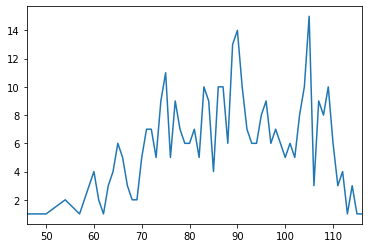

In [59]:
df['actual_max_temp'].value_counts().sort_index().plot();

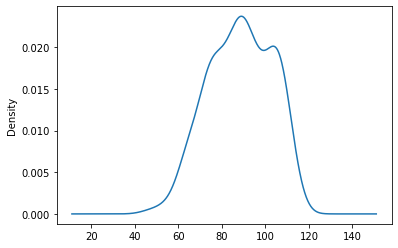

In [60]:
df['actual_max_temp'].plot.density();

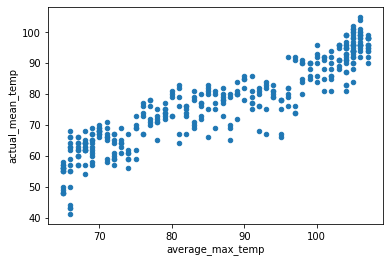

In [64]:
df.plot.scatter('average_max_temp','actual_mean_temp');

In [80]:
table2 = pd.crosstab(df['date'], df['average_precipitation'])
table2

average_precipitation,0.00,0.01,0.02,0.03,0.04,0.05
date,,,,,,
2014-10-1,0,0,1,0,0,0
2014-10-10,0,1,0,0,0,0
2014-10-11,0,0,1,0,0,0
2014-10-12,0,0,1,0,0,0
2014-10-13,0,0,1,0,0,0
...,...,...,...,...,...,...
2015-6-5,1,0,0,0,0,0
2015-6-6,1,0,0,0,0,0
2015-6-7,1,0,0,0,0,0


In [81]:
table2 = pd.crosstab(df['average_precipitation'], df['date'])
table2

date,2014-10-1,2014-10-10,2014-10-11,2014-10-12,2014-10-13,2014-10-14,2014-10-15,2014-10-16,2014-10-17,2014-10-18,2014-10-19,2014-10-2,2014-10-20,2014-10-21,2014-10-22,2014-10-23,2014-10-24,2014-10-25,2014-10-26,2014-10-27,2014-10-28,2014-10-29,2014-10-3,2014-10-30,2014-10-31,2014-10-4,2014-10-5,2014-10-6,2014-10-7,2014-10-8,2014-10-9,2014-11-1,2014-11-10,2014-11-11,2014-11-12,2014-11-13,2014-11-14,2014-11-15,2014-11-16,2014-11-17,...,2015-5-29,2015-5-3,2015-5-30,2015-5-31,2015-5-4,2015-5-5,2015-5-6,2015-5-7,2015-5-8,2015-5-9,2015-6-1,2015-6-10,2015-6-11,2015-6-12,2015-6-13,2015-6-14,2015-6-15,2015-6-16,2015-6-17,2015-6-18,2015-6-19,2015-6-2,2015-6-20,2015-6-21,2015-6-22,2015-6-23,2015-6-24,2015-6-25,2015-6-26,2015-6-27,2015-6-28,2015-6-29,2015-6-3,2015-6-30,2015-6-4,2015-6-5,2015-6-6,2015-6-7,2015-6-8,2015-6-9
average_precipitation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
0.01,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0.02,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


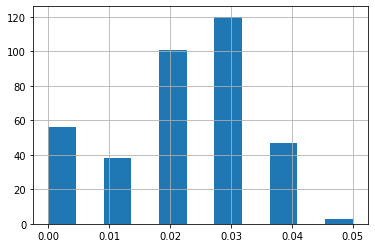

In [82]:
df['average_precipitation'].hist(bins=11);

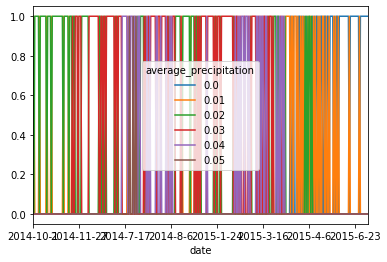

In [72]:
# Not what I was hoping for
table2.plot();

In [70]:
table2 = pd.crosstab(df['date'], df['average_max_temp'])
table2

average_max_temp,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-10-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-10-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-10-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-10-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-6-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2015-6-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2015-6-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
